In [ ]:
import pandas as pd
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/FakeNewsDataset/train - Copy.csv')

In [ ]:
df.head()

,id,text,author,heading,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df.shape

(20800, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       20800 non-null  int64 
 1   text     20242 non-null  object
 2   author   18843 non-null  object
 3   heading  20761 non-null  object
 4   label    20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


Drop Nan Values

In [ ]:
df=df.dropna()

Get the Independent Features

In [ ]:
X=df.drop('label',axis=1)

Get the Dependent features

In [ ]:
y=df['label']

In [ ]:
X.shape #No. of rows & no. of columns

(18285, 4)

In [ ]:
X

,id,text,author,heading
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [ ]:
y.shape #Labels

(18285,)

In [ ]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 18285, dtype: int64

# Data Pre-processing

In [ ]:
messages=X.copy()

In [ ]:
messages['text'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [ ]:
messages.reset_index(inplace=True)

In [ ]:
messages

,index,id,text,author,heading
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...,...
18280,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
18281,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
18282,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
18283,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [ ]:
import nltk #Natural Language tool kit
import re #Regular Expressions
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

For Training Data

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

corpus[1]

'flynn hillari clinton big woman campu breitbart'

In [ ]:
corpus[1]

'flynn hillari clinton big woman campu breitbart'

In [ ]:
import numpy as np
X_final=np.array(corpus)
y_final=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [ ]:
len(corpus),y.shape

(18285, (18285,))

In [ ]:
X_final.shape,y_final.shape

((18285,), (18285,))

In [ ]:
X_train

array(['envi', 'inform',
       'lawsuit aim hold contractor account c tortur new york time', ...,
       'sail coupl seiz somali pirat appar abduct philippin new york time',
       'presid trump honor littl sister poor first white hous nat l day prayer year breitbart',
       'occupi david fri releas jail realli free'], dtype='<U299')

In [ ]:



import string
# Building a vocabulary of words from the given documents
vocab = {}
for i in range(len(corpus)):
    word_list = []
    for word_new in corpus[i].split():
        if (len(word_new)>2):  
            if word_new in vocab:
                vocab[word_new]+=1
            else:
                vocab[word_new]=1       

In [ ]:
vocab

{'hous': 312,
 'dem': 95,
 'aid': 91,
 'even': 232,
 'see': 127,
 'comey': 157,
 'letter': 53,
 'jason': 15,
 'chaffetz': 7,
 'tweet': 63,
 'flynn': 35,
 'hillari': 1123,
 'clinton': 1120,
 'big': 148,
 'woman': 123,
 'campu': 27,
 'breitbart': 2403,
 'truth': 75,
 'might': 34,
 'get': 301,
 'fire': 170,
 'civilian': 48,
 'kill': 297,
 'singl': 25,
 'airstrik': 33,
 'identifi': 16,
 'iranian': 24,
 'jail': 46,
 'fiction': 6,
 'unpublish': 1,
 'stori': 89,
 'stone': 19,
 'death': 131,
 'adulteri': 1,
 'jacki': 6,
 'mason': 7,
 'hollywood': 74,
 'would': 117,
 'love': 85,
 'trump': 3495,
 'bomb': 102,
 'north': 133,
 'korea': 77,
 'lack': 23,
 'tran': 12,
 'bathroom': 22,
 'exclus': 91,
 'video': 417,
 'beno': 2,
 'hamon': 2,
 'win': 233,
 'french': 69,
 'socialist': 10,
 'parti': 135,
 'presidenti': 115,
 'nomin': 34,
 'new': 7024,
 'york': 6343,
 'time': 6480,
 'back': 220,
 'channel': 20,
 'plan': 266,
 'ukrain': 27,
 'russia': 385,
 'courtesi': 2,
 'associ': 25,
 'obama': 544,
 'orga

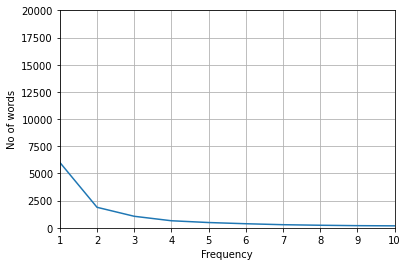

In [ ]:
import matplotlib.pyplot as plt

num_words = [0 for i in range(max(vocab.values())+1)] 
freq = [i for i in range(max(vocab.values())+1)] 
for key in vocab:
    num_words[vocab[key]]+=1
plt.plot(freq,num_words)
plt.axis([1, 10, 0, 20000])
plt.xlabel("Frequency")
plt.ylabel("No of words")
plt.grid()
plt.show()

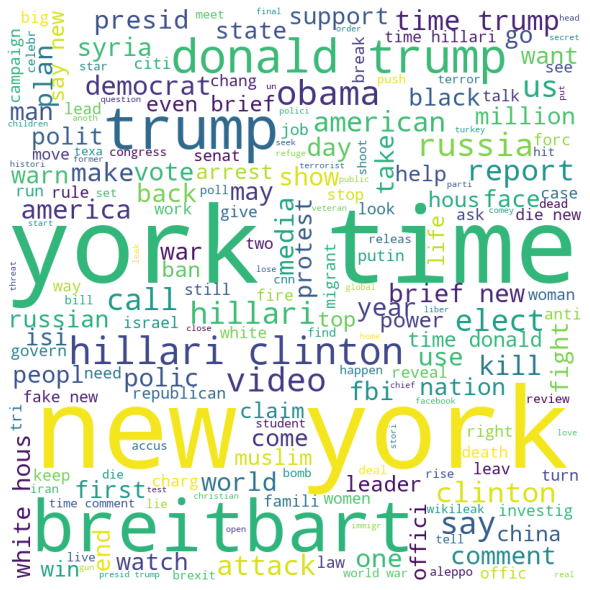

In [ ]:
from wordcloud import WordCloud

comment_words = " ".join(corpus)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
sortedVocab = dict(sorted(vocab.items(), key=lambda item: item[1], reverse=True)[:5])

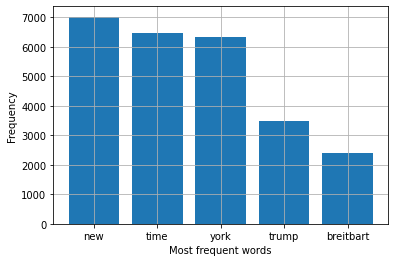

In [ ]:
plt.bar(sortedVocab.keys(), sortedVocab.values())
# plt.axis([1, 10, 0, 20000])
plt.xlabel("Most frequent words")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [ ]:
sortedVocab = dict(sorted(vocab.items(), key=lambda item: item[1], reverse=True)[-5:])

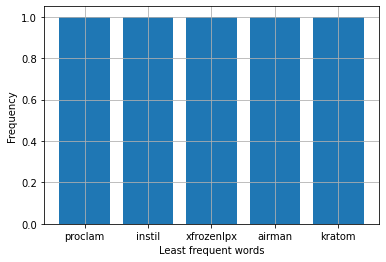

In [ ]:
plt.bar(sortedVocab.keys(), sortedVocab.values())
plt.xlabel("Least frequent words")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [ ]:
cutoff_freq = 40
# For deciding cutoff frequency
num_words_above_cutoff = len(vocab)-sum(num_words[0:cutoff_freq]) 
print("Number of words with frequency higher than cutoff frequency({}) :".format(cutoff_freq),num_words_above_cutoff)

Number of words with frequency higher than cutoff frequency(40) : 706


In [ ]:
# Words with frequency higher than cutoff frequency are chosen as features
# (i.e we remove words with low frequencies as they would not be significant )
features = []
for key in vocab:
    if vocab[key] >=cutoff_freq:
        features.append(key)

In [ ]:
# To represent training data as word vector counts
X_train_dataset = np.zeros((len(X_train),len(features)))
# This can take some time to complete
for i in range(len(X_train)):
    # print(i) 
    word_list = [ word.strip(string.punctuation).lower() for word in X_train[i].split()]
    for word in word_list:
        if word in features:
            X_train_dataset[i][features.index(word)] += 1

X_train_dataset

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# To represent test data as word vector counts
X_test_dataset = np.zeros((len(X_test),len(features)))
for i in range(len(X_test)):
    word_list = [ word.strip(string.punctuation).lower() for word in X_test[i].split()]
    for word in word_list:
        if word in features:
            X_test_dataset[i][features.index(word)] += 1

In [ ]:
# Using sklearn's Multinomial Naive Bayes
clf = MultinomialNB()
clf.fit(X_train_dataset,y_train)
Y_test_pred = clf.predict(X_test_dataset)
sklearn_score_train = clf.score(X_train_dataset,y_train)
print("Sklearn's score on training data :",sklearn_score_train)
sklearn_score_test = clf.score(X_test_dataset,y_test)
print("Sklearn's score on testing data :",sklearn_score_test)
print("Classification report for testing data :-")
print(classification_report(y_test, Y_test_pred))

Sklearn's score on training data : 0.8722448979591837
Sklearn's score on testing data : 0.8505385252692627
Classification report for testing data :-
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      3419
           1       0.85      0.80      0.82      2616

    accuracy                           0.85      6035
   macro avg       0.85      0.84      0.85      6035
weighted avg       0.85      0.85      0.85      6035

